## k평균 알고리즘

<예시로 알고리즘 알아보기>
1. 2개의 군집 중심점 설정
2. 각 데이터는 가장 가까운 중심점에 소속
3. 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동
4. 각 데이터는 이동된 중심점 기준으로 가장 가까운 중심점에 소속
5. 다시 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동 
이때, 중심점을 이동하였지만 데이터들의 중심점 소속 변경이 없으면 군집화 완료

<장점>
- 가장 많이 활용
- 쉽고 간결

<단점>
- 거리 기반 알고리즘으로 속성의 개수가 많을수록 정확도가 떨어짐 -> 차원 축소 필요
- 반복 수행 시, 횟수가 많을경우 수행 시간이 느려짐
- 군점 개수 초기 설정하는데 어려움 있을 수 있음 

<사이킷런 kmeans 클래스> <br>
### `class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,precompute_distances='auto',verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')`

- n_clusters (int): 생성할 클러스터의 개수를 지정, 기본값은 8

- init (str or ndarray): 초기 중심점을 선택하는 방법을 지정, 기본값은 k-means++

- n_init (int): 초기 중심점을 선택하는 데 사용되는 무작위 초기화의 수. 알고리즘은 이러한 초기화 중에서 최적의 결과를 선택합니다. 기본값은 10입니다.

- max_iter (int): 알고리즘의 최대 반복 횟수를 지정합니다. 이 횟수 이후에도 알고리즘이 수렴하지 않으면 반복이 종료됩니다. 기본값은 300입니다.

- tol (float): 알고리즘의 수렴을 판단하는 허용 오차 값입니다. 중심점 이동의 변화가 이 값보다 작으면 알고리즘이 수렴되었다고 판단하고 종료합니다. 기본값은 0.0001입니다.

- precompute_distances (str or bool): 거리 계산을 사전에 미리 계산할지 여부를 지정합니다. 가능한 값은 'auto', True, False입니다. 'auto'는 자동으로 거리 계산 방법을 선택하며, 기본값입니다.

- verbose (int): 알고리즘 실행 과정에서의 출력 메시지의 상세도를 조절합니다. 0은 출력을 하지 않음을 의미하고, 1은 일부 메시지를 출력합니다. 기본값은 0입니다.

- random_state (int, RandomState instance or None): 난수 생성기의 시드를 지정합니다. 난수 생성에 사용되는 값으로, 동일한 시드를 사용하면 동일한 결과를 얻을 수 있습니다. 기본값은 None입니다.

- copy_x (bool): 입력 데이터를 복사할지 여부를 지정합니다. True로 설정하면 입력 데이터가 변경되지 않습니다. 기본값은 True입니다.

- n_jobs (int): 병렬 처리에 사용할 작업 스레드 수를 지정합니다. -1로 설정하면 가능한 모든 프로세서를 사용합니다. 기본값은 1입니다.

- algorithm (str): K-means 알고리즘의 변형 방법을 지정합니다. 가능한 값은 'auto', 'full', 'elkan'입니다. 'auto'는 알고리즘에 따라 자동으로 선택되며, 기본값입니다.

<적용>
`fit_transform`
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심점 좌표 shape는 [군집개수, 피처 개수]

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_) # 각 레코드가 n번째 군집에 속함을 의미 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
# 군집화 효과적으로 됐는지 확인 
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
# target과 cluster 열의 조합에 대해 그룹을 생성하고 sepal_length 열의 값들의 개수를 세는 작업 
print(iris_result)

# target 0은 모두 1군집에, target 1은 군집0에 48개 2개는 2군집에 잘못 분류됨 

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [7]:
# 시각화하기 전, 데이터 속성이 4개이므로 2개로 축소 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0] # 첫번째 주성분에 해당하는 열 선택 
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


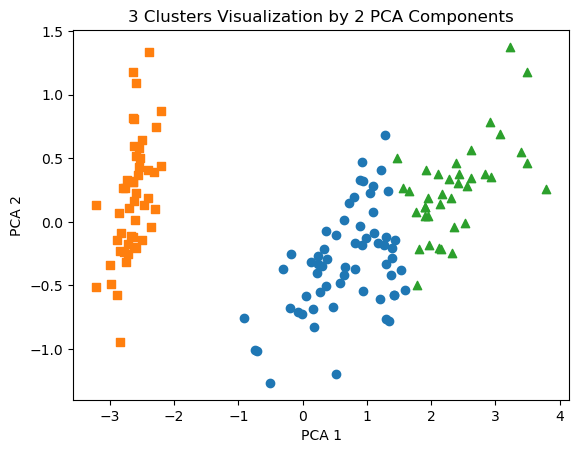

In [9]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#cluster0과 1의 경우 속성의 위치 자체가 명확하게 분리되지 않음

### Clustering 알고리즘 테스트를 위한 데이터 생성 

make_blobs(): 군집화를 위한 테스트 데이터 만드는 메소드 

`make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)`

n_samples (int): 생성할 데이터의 총 개수를 지정합니다.<br>
n_features (int): 각 데이터의 특성(feature) 개수를 지정합니다.<br>
centers (int 또는 ndarray): 생성할 클러스터의 개수를 지정하거나, 클러스터의 중심점 좌표를 직접 지정할 수 있습니다.<br>
cluster_std (float 또는 배열): 클러스터 내의 데이터의 표준 편차를 지정합니다. 값이 클수록 클러스터 내의 데이터가 흩어집니다.<br>
center_box (tuple): 중심점 좌표를 랜덤하게 생성할 범위를 지정합니다. 예를 들어, (-10.0, 10.0)은 X, Y 좌표 모두 -10부터 10까지의 범위에서 중심점을 생성합니다.<br>
shuffle (bool): 생성된 데이터를 무작위로 섞을지 여부를 지정합니다.<br>
random_state (int): 난수 발생 시드를 설정합니다.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
# 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 x와 
# 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환된다. 
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)


# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
# 배열 y 에서 고유한 값과 해당 값의 등장 횟수 반환
# 반환 되는 결과는 2개의 배열
# 1. unique : 중복된 값을 제외하고 오름차순으로 정렬된 고유한 값
#2. counts: 각 고유한 값의 등장 횟수를 담은 배열 
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- df로 바꾸어 편리하게 데이터 가공해보자 

In [13]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


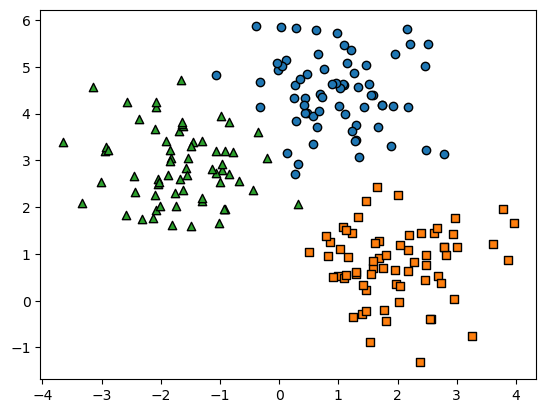

In [14]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )


plt.show()

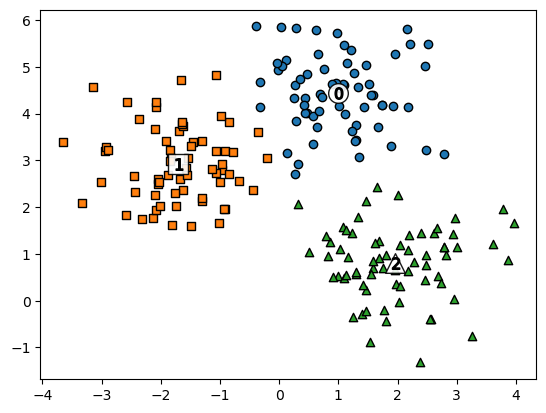

In [15]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()


In [16]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
